In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

root_pasth = str(Path('__file__').resolve().parent.parent.parent.parent.parent)

# データの読み込み
df = pd.read_csv(f'{root_pasth}/datasets/wine_class.csv')

# データの表示（先頭３件）
df.head(3)

/Users/esaki01/.local/share/virtualenvs/ml-notebooks-rAvDjhvL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/esaki01/.local/share/virtualenvs/ml-notebooks-rAvDjhvL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/esaki01/.local/share/virtualenvs/ml-notebooks-rAvDjhvL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [2]:
# 目的変数
t = df['Class']

# 入力変数
x = df.drop('Class', axis=1)

x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [3]:
# 形の確認
x.shape

(178, 10)

In [4]:
type(x)

pandas.core.frame.DataFrame

In [5]:
type(x.values)

numpy.ndarray

In [6]:
# ユニークな値を確認
np.unique(t)

array([1, 2, 3])

In [7]:
# ラベルを 0 から始める
t = t.values - 1
x = x.values

t, type(t)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 numpy.ndarray)

In [8]:
x, type(x)

(array([[1.423e+01, 2.430e+00, 1.560e+01, ..., 5.640e+00, 1.040e+00,
         1.065e+03],
        [1.320e+01, 2.140e+00, 1.120e+01, ..., 4.380e+00, 1.050e+00,
         1.050e+03],
        [1.316e+01, 2.670e+00, 1.860e+01, ..., 5.680e+00, 1.030e+00,
         1.185e+03],
        ...,
        [1.327e+01, 2.260e+00, 2.000e+01, ..., 1.020e+01, 5.900e-01,
         8.350e+02],
        [1.317e+01, 2.370e+00, 2.000e+01, ..., 9.300e+00, 6.000e-01,
         8.400e+02],
        [1.413e+01, 2.740e+00, 2.450e+01, ..., 9.200e+00, 6.100e-01,
         5.600e+02]]),
 numpy.ndarray)

In [9]:
from sklearn.model_selection import train_test_split

# 学習データとテストデータの分割
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.7, random_state=0)

x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((124, 10), dtype('float64'), (54, 10), dtype('float64'))

In [10]:
t_train.shape, t_train.dtype, t_test.shape, t_test.dtype

((124,), dtype('int64'), (54,), dtype('int64'))

In [11]:
# 32 bit にキャスト
x_train = np.array(x_train, np.float32)
x_test = np.array(x_train, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_train, np.int32)

In [12]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_random_seed(seed) # tensorflowのシードを固定

In [13]:
from tensorflow.keras import models, layers

# シードの固定
reset_seed(0)

# モデルの構築
model = models.Sequential([
    layers.Dense(units=10, activation='relu', input_shape=(10,)),
    layers.Dense(units=3, activation='softmax')
])

# model = models.Sequential()
# model.add(layers.Dense(units=10, activation='relu', input_shape=(10,)))
# model.add(layers.Dense(units=3, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# こちらでも同じ
# model.compile(optimizer=tf.keras.optimizers.SGD(),
#                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.Accuracy()])

In [15]:
# モデルの学習
history = model.fit(x_train, t_train, batch_size=10, epochs=10, validation_data=(x_test, t_test))

Train on 124 samples, validate on 124 samples
Epoch 1/10
124/124 [==============================] - 0s 693us/sample - loss: 162.3365 - acc: 0.3306 - val_loss: 1.0979 - val_acc: 0.3226
Epoch 2/10
124/124 [==============================] - 0s 221us/sample - loss: 1.0980 - acc: 0.3387 - val_loss: 1.0974 - val_acc: 0.3952
Epoch 3/10
124/124 [==============================] - 0s 151us/sample - loss: 1.0973 - acc: 0.3629 - val_loss: 1.0966 - val_acc: 0.3952
Epoch 4/10
124/124 [==============================] - 0s 215us/sample - loss: 1.0967 - acc: 0.3952 - val_loss: 1.0959 - val_acc: 0.3952
Epoch 5/10
124/124 [==============================] - 0s 246us/sample - loss: 1.0958 - acc: 0.3952 - val_loss: 1.0952 - val_acc: 0.3952
Epoch 6/10
124/124 [==============================] - 0s 184us/sample - loss: 1.0952 - acc: 0.3952 - val_loss: 1.0948 - val_acc: 0.3952
Epoch 7/10
124/124 [==============================] - 0s 210us/sample - loss: 1.0948 - acc: 0.3952 - val_loss: 1.0943 - val_acc: 0.3952


In [16]:
# 学習過程
history.history

{'loss': [162.33649122714996,
  1.0980117205650575,
  1.097321864097349,
  1.096653280719634,
  1.0957879885550468,
  1.0952091120904492,
  1.094848354016581,
  1.0944863673179381,
  1.0937923442932866,
  1.0935336312940043],
 'acc': [0.33064517,
  0.33870968,
  0.36290324,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613],
 'val_loss': [1.0979123615449475,
  1.0973679000331509,
  1.0966001460629125,
  1.0958509618236172,
  1.0952109675253592,
  1.0947754940678995,
  1.09432694988866,
  1.0938365978579367,
  1.0933478436162394,
  1.0930784633082729],
 'val_acc': [0.32258064,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613,
  0.3951613]}

In [17]:
# Pandas 形式
result = pd.DataFrame(history.history)
result.head()

,loss,acc,val_loss,val_acc
0,162.336491,0.330645,1.097912,0.322581
1,1.098012,0.338710,1.097368,0.395161
2,1.097322,0.362903,1.096600,0.395161
3,1.096653,0.395161,1.095851,0.395161
4,1.095788,0.395161,1.095211,0.395161


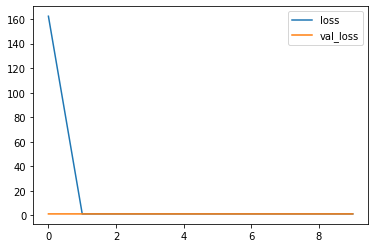

In [18]:
# 目的関数の値
result[['loss', 'val_loss']].plot();

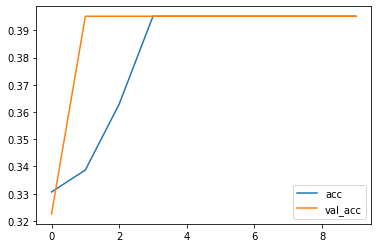

In [19]:
# 正解率
result[['acc', 'val_acc']].plot();

In [20]:
# シードの固定
reset_seed(0)

# モデルの構築
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(10,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# モデルのコンパイル
model.compile(optimizer='sgd',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# モデルの学習
history = model.fit(x_train, t_train,
          batch_size=10,
          epochs=50,
          validation_data=(x_test, t_test))

Train on 124 samples, validate on 124 samples
Epoch 1/50
124/124 [==============================] - 0s 1ms/sample - loss: 1.4762 - acc: 0.1210 - val_loss: 4.5440 - val_acc: 0.3952
Epoch 2/50
124/124 [==============================] - 0s 275us/sample - loss: 1.2940 - acc: 0.1935 - val_loss: 3.0850 - val_acc: 0.2661
Epoch 3/50
124/124 [==============================] - 0s 198us/sample - loss: 1.1748 - acc: 0.2339 - val_loss: 2.5215 - val_acc: 0.1613
Epoch 4/50
124/124 [==============================] - 0s 206us/sample - loss: 1.0700 - acc: 0.3790 - val_loss: 2.2073 - val_acc: 0.1855
Epoch 5/50
124/124 [==============================] - 0s 270us/sample - loss: 0.9755 - acc: 0.4758 - val_loss: 1.9377 - val_acc: 0.2581
Epoch 6/50
124/124 [==============================] - 0s 235us/sample - loss: 0.8984 - acc: 0.6048 - val_loss: 1.7364 - val_acc: 0.2742
Epoch 7/50
124/124 [==============================] - 0s 255us/sample - loss: 0.8409 - acc: 0.6935 - val_loss: 1.5350 - val_acc: 0.2742
Epoc

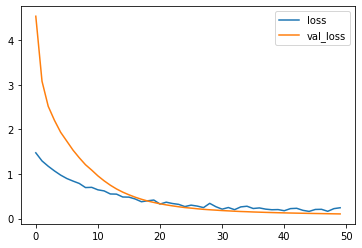

In [21]:
# 正解率と損失を Pandas の形式に変換
result_batchnorm = pd.DataFrame(history.history)

# 目的関数の値
result_batchnorm[['loss', 'val_loss']].plot();

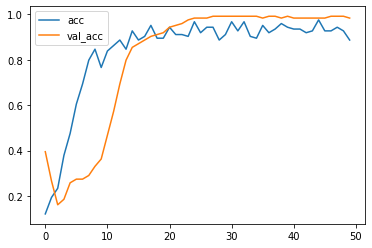

In [22]:
# 正解率
result_batchnorm[['acc', 'val_acc']].plot();

In [23]:
# モデルの保存
model.save(filepath=f'{root_pasth}/models/wine_model.h5', save_format='h5')

In [24]:
# モデルの読み込み
loaded_model = tf.keras.models.load_model(f'{root_pasth}/models/wine_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
# データの準備
sample = x_train[0]
sample.shape

(10,)

In [26]:
# 形を変換
sample = sample.reshape(1, 10)
sample.shape

(1, 10)

In [27]:
# 予測値の計算
y = loaded_model.predict(sample)
y

array([[0.93740547, 0.04037751, 0.02221712]], dtype=float32)

In [28]:
# 最も値の大きなラベルを取得
np.argmax(y)

0

In [29]:
# 正解ラベル
t_train[0]

0